In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import h5py

from typing import NamedTuple

In [40]:
metrics = ("fan1", "fan2", "foil")

In [93]:
all_res = []

with h5py.File("../data/num_neurons.h5", "r") as fi:
    
    for n_neurons, seeds in fi.items():
        for met in metrics:
            tmp_res = np.array([np.array(v[met]).T for v in fi[n_neurons].values()])
            all_res.append(
                (n_neurons, 1e-4, met, tmp_res.reshape(
                    (tmp_res.shape[0]*tmp_res.shape[1], -1))))

In [94]:
df = pd.DataFrame(all_res, columns=("n_neurons", "voja_rate", "response", "value"))
df

,n_neurons,voja_rate,response,value
0,10,0.0001,fan1,"[[0.0, 0.0, 0.0, 0.0, 9.95016625083, 9.8511604..."
1,10,0.0001,fan2,"[[52.4349260728, 51.913189841, 51.3966449715, ..."
2,10,0.0001,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,30,0.0001,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 9.95016625083, 9.85..."
4,30,0.0001,fan2,"[[52.8477983879, 52.3219540079, 51.801341867, ..."
5,30,0.0001,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,50,0.0001,fan1,"[[0.0, 0.0, 0.0, 0.0, 9.95016625083, 9.8511604..."
7,50,0.0001,fan2,"[[74.469670022, 73.7286844247, 72.9950717572, ..."
8,50,0.0001,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


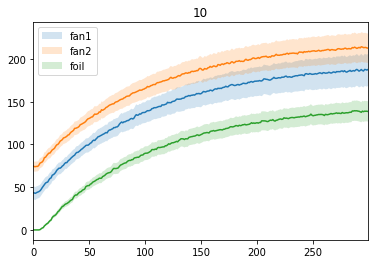

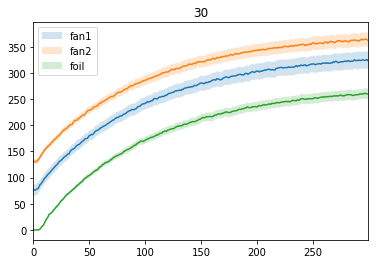

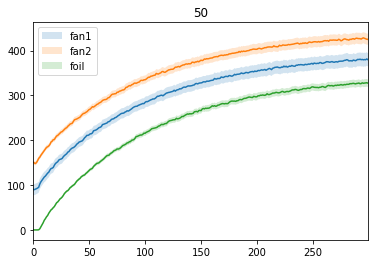

In [96]:
resps = df.response.unique()
n_neurons = np.sort(df.n_neurons.unique())

for nrn in n_neurons:
    plt.figure()
    plt.title(nrn)
    
    for r_i, resp in enumerate(resps):
        dat = df[(df.response == resp) & (df.n_neurons == nrn)].iloc[0].value
        sns.tsplot(dat, color="C%s" % r_i)
    
    plt.legend(resps)

In [90]:
all_res = []

with h5py.File("../data/voja_rate.h5", "r") as fi:
    
    for voja_rate, seeds in fi.items():
        for met in metrics:
            tmp_res = np.array([np.array(v[met]).T for v in fi[voja_rate].values()])
            all_res.append(
                (10, float(voja_rate), met, tmp_res.reshape(
                    (tmp_res.shape[0]*tmp_res.shape[1], -1))))

In [91]:
df = pd.DataFrame(all_res, columns=("n_neurons", "voja_rate", "response", "value"))
df

,n_neurons,voja_rate,response,value
0,10,0.00100,fan1,"[[0.0, 9.95016625083, 9.85116044241, 9.7531397..."
1,10,0.00100,fan2,"[[201.895416142, 199.886523186, 197.897619049,..."
2,10,0.00100,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,10,0.00010,fan1,"[[0.0, 0.0, 0.0, 0.0, 9.95016625083, 9.8511604..."
4,10,0.00010,fan2,"[[48.7647623908, 48.2795448978, 47.7991553996,..."
5,10,0.00010,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,10,0.00001,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 9.95016625083, 9.85..."
7,10,0.00001,fan2,"[[33.2105016401, 32.8800516275, 32.5528896475,..."
8,10,0.00001,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


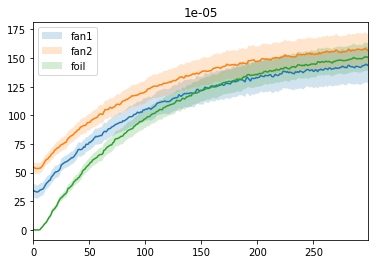

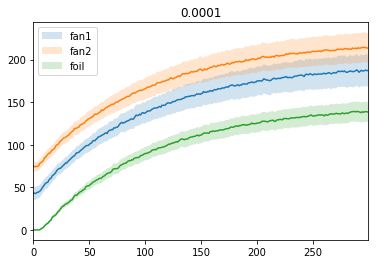

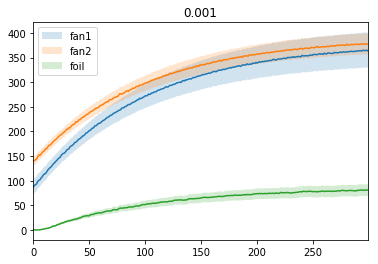

In [92]:
resps = df.response.unique()
voja_rates = np.sort(df.voja_rate.unique())

for vr in voja_rates:
    plt.figure()
    plt.title(vr)
    
    for r_i, resp in enumerate(resps):
        dat = df[(df.response == resp) & (df.voja_rate == vr)].iloc[0].value
        sns.tsplot(dat, color="C%s" % r_i)
    
    plt.legend(resps)

In [97]:
all_res = []

with h5py.File("../data/basic_match.h5", "r") as fi:
    
    for voja_rate, seeds in fi.items():
        for met in metrics:
            tmp_res = np.array([np.array(v[met]).T for v in fi[voja_rate].values()])
            all_res.append(
                (10, float(voja_rate), met, tmp_res.reshape(
                    (tmp_res.shape[0]*tmp_res.shape[1], -1))))

In [98]:
df = pd.DataFrame(all_res, columns=("n_neurons", "voja_rate", "response", "value"))
df

,n_neurons,voja_rate,response,value
0,10,0.000010,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 19.9003325017, 39.6..."
1,10,0.000010,fan2,"[[113.235191068, 112.108482092, 110.992984057,..."
2,10,0.000010,foil,"[[184.588178102, 182.751495042, 180.933087284,..."
3,10,0.000025,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 29.8504987525, 29.5..."
4,10,0.000025,fan2,"[[112.300072623, 111.18266823, 110.076382197, ..."
5,10,0.000025,foil,"[[184.588178102, 182.751495042, 180.933087284,..."
6,10,0.000500,fan1,"[[0.0, 9.95016625083, 9.85116044241, 19.703306..."
7,10,0.000500,fan2,"[[166.313653302, 164.658804802, 182.920754821,..."
8,10,0.000500,foil,"[[184.588178102, 182.751495042, 180.933087284,..."
9,10,0.000050,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 29.8504987525, 29.5..."


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


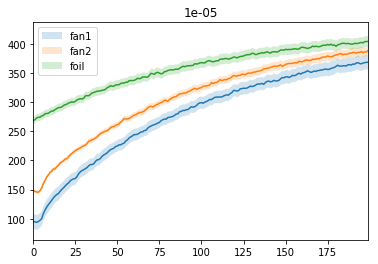

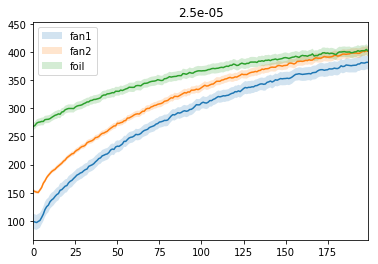

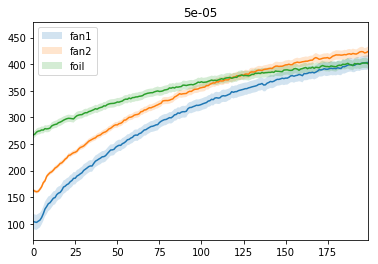

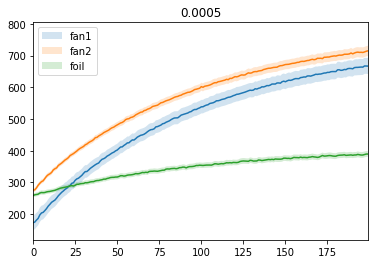

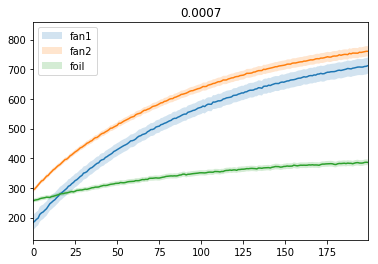

In [99]:
resps = df.response.unique()
voja_rates = np.sort(df.voja_rate.unique())

for vr in voja_rates:
    plt.figure()
    plt.title(vr)
    
    for r_i, resp in enumerate(resps):
        dat = df[(df.response == resp) & (df.voja_rate == vr)].iloc[0].value
        sns.tsplot(dat, color="C%s" % r_i)
    
    plt.legend(resps)